### Wersja beta.


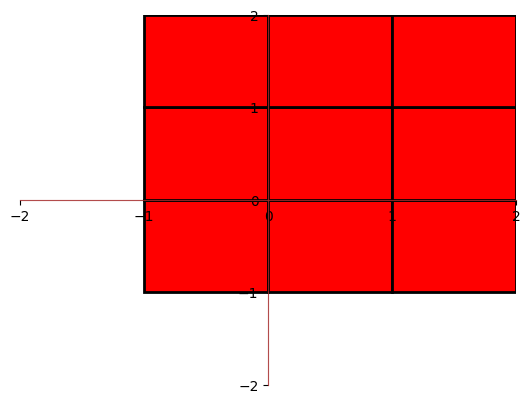

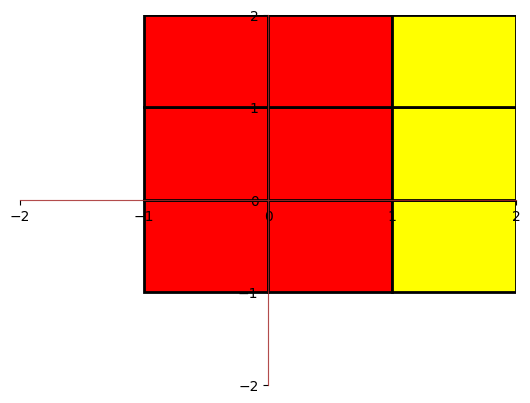

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

dekoder_colorow = {1:"Red",2:"Orange",3:"Green",
                  4:"Blue",5:"White",6:"Yellow"}



class Ściana():
    Ściany = [ '', '', '' ,'','','']
    


    def __init__(self, centr:int):
        """Funkcja inicjalizująca obiekt będący reprezentantem klasy ścianaa.
        Liczba centr oznacza kolor, zgodnie z kodowaniem zawartym w dokumentacji. Zakładamy, że
        ścianaa jest wypełniona tymi sam kolorem"""
        self.sciana = np.full(shape = (3,3),
                              fill_value = centr)
        
        self.centr = centr
        self.ZnajdźSąsiada()

        Ściana.Ściany[centr-1] = self



    def ZnajdźSąsiada(self,):
        #Znajdź ściankę sąsiądującą. Pary sąsiądów:
        #czerwony - pomarańczowy (1-2)
        #zielony - niebieski (3-4)
        #biały - żółty (5-6)

        if self.centr%2 == 0:
            self.sąsiad = self.centr - 1
        elif self.centr%2  == 1:
            self.sąsiad = self.centr +1


    def ZwróćSąsiada(self,):
        return self.sąsiad


    def ZnajdźŚcianę(id:int):
        return Ściana.Ściany[id-1]
    
        


class Ścianka():


    def __init__(self,  sciana:Ściana,x:int, y:int) -> None:
        """"Funkcja inicjalizuje ściankę, której położenie można opisać za pomocą trzech iczb:
        (sciana, x, y), gdzie sciana to id sciany, na której jest ścianka, x to polozenie w poziomie (-1 lub 0 lub 1), a y to polozenie w 
        pionie (-1 lub 0 lub 1). kolor to kolor ściany"""
        self.sciana = sciana
        self.kolor = sciana.centr

        self.x = x
        self.y = y
        
        ListaŚcianek.append(self)
    



class Kostka():


    def __init__(self, orient: dict):
        #Zakładmy, że pierwsze element znajduje się przed nami, drugi - na prawo, a trzeci - na górze.
        self.orient = orient


        self.ZnajdźPozostałeŚcianki()
    
    def ZnajdźPozostałeŚcianki(self,):
        for loc in ['F','R','U']:
        
            if loc == "F":
                klucz = "B"
            elif loc == "R":
                klucz = 'L'
            elif loc == "U":
                klucz = "D"

            self.orient[klucz] = Ściana.ZnajdźŚcianę(self.orient[loc].ZwróćSąsiada())


    def NowePołozenie(self, x, y, direction: int = 1):
        #Funkcja ta de facto obraca punkt (x,y) o 90 stopni względem (0,0). Jeżeli direction == 1, to obrót odbywa się clock,
        #jeżeli diretion == -1, to ruch odbywa się counterwise
        macierz_obrotu = np.array([[0,-1],[1,0]],dtype = np.int8)

        xprim, yprim = np.matmul(      (-direction)*macierz_obrotu , np.array([x,y]).reshape(2,1)).flatten()


        return xprim, yprim
            

            
        
    def ZamieńPołożenia(self,loc:str, type:int = 1):
        if type == 1:
            return loc
        elif type ==  -1:
            if loc == "U":
                return "D"
            elif loc == "D":
                return "U"
            elif loc == "R":
                return "L"
            elif loc == "L":
                return "R"      
            elif loc == "F":
                return "B"
            elif loc == "B":
                return "F"
            


    def RuchR(self, type: int = 1):
        for ścianka in ListaŚcianek:
            macierzowaściana = ścianka.sciana
            x,y = ścianka.x, ścianka.y

          
            if macierzowaściana is self.orient['R']:
                x, y = self.NowePołozenie(x, y, direction = type)

            elif x == 1:
                if macierzowaściana is self.orient['F']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia("U",type)]
                elif macierzowaściana is self.orient['U']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia("B", type)]
                elif macierzowaściana is self.orient['B']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia("D", type)]
                elif macierzowaściana is self.orient['D']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia("F", type)]
                

         
           
    
    def RuchL(self, type:int = 1):
        for ścianka in ListaŚcianek:
            macierzowaściana = ścianka.sciana
            x,y = ścianka.x, ścianka.y
  
            if macierzowaściana is self.orient['L']:
                ścianka.x, ścianka.y = self.NowePołozenie(x, y, type)

            elif x == -1:
                if macierzowaściana is self.orient['U']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('F', type)]

                elif macierzowaściana is self.orient['F']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('D', type)]

                elif macierzowaściana is self.orient['D']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('B', type)]

                elif macierzowaściana is self.orient['B']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('U', type)] 

    def RuchU(self, type:int = 1):
        for ścianka in ListaŚcianek:
            macierzowaściana = ścianka.sciana
            x,y = ścianka.x, ścianka.y
  
            if macierzowaściana is self.orient['U']:
                ścianka.x, ścianka.y = self.NowePołozenie(x, y, type)

            elif y == 1:
                if macierzowaściana is self.orient['F']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('L', type)]

                elif macierzowaściana is self.orient['R']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('F', type)]

                elif macierzowaściana is self.orient['B']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('R', type)]

                elif macierzowaściana is self.orient['L']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('B', type)] 

                

    def RuchD(self, type:int = 1):
        for ścianka in ListaŚcianek:
            macierzowaściana = ścianka.sciana
            x,y = ścianka.x, ścianka.y
  
            if macierzowaściana is self.orient['D']:
                ścianka.x, ścianka.y = self.NowePołozenie(x, y, type)

            elif y == -1:
                if macierzowaściana is self.orient['F']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('R', type)]

                elif macierzowaściana is self.orient['R']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('B', type)]

                elif macierzowaściana is self.orient['B']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('L', type)]

                elif macierzowaściana is self.orient['L']:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('F', type)] 

    def RuchF(self, type:int = 1):
        for ścianka in ListaŚcianek:
            macierzowaściana = ścianka.sciana
            x,y = ścianka.x, ścianka.y
  
            if macierzowaściana is self.orient['F']:
                ścianka.x, ścianka.y = self.NowePołozenie(x, y, type)

            else:
                if macierzowaściana is self.orient['U'] and y == -1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('R', type)]

                elif macierzowaściana is self.orient['R'] and x == -1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('D', type)]

                elif macierzowaściana is self.orient['D'] and y == -1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('L', type)]

                elif macierzowaściana is self.orient['L'] and x == -1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('U', type)] 

    def RuchB(self, type:int = 1):
        for ścianka in ListaŚcianek:
            macierzowaściana = ścianka.sciana
            x,y = ścianka.x, ścianka.y
  
            if macierzowaściana is self.orient['B']:
                ścianka.x, ścianka.y = self.NowePołozenie(x, y, type)

            else:
                if macierzowaściana is self.orient['U'] and y == 1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('R', type)]

                elif macierzowaściana is self.orient['R'] and x == 1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('D', type)]

                elif macierzowaściana is self.orient['D'] and y == 1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('L', type)]

                elif macierzowaściana is self.orient['L'] and x == 1:
                    ścianka.sciana = self.orient[self.ZamieńPołożenia('U', type)] 


        


   


    
    def WyświetlStanKostki(self,):
        okienko = plt.figure()
        osie = okienko.add_subplot()

        x_start = -2
        x_end = 2

        y_start  = -2
        y_end = 2

        osie.set_xlim(x_start, x_end)
        osie.set_ylim(y_start, y_end)
        ticks = np.arange(x_start, y_end+1, 1)

        osie.spines[:].set_position(('data',0))
        osie.spines[:].set_color('brown')
        osie.spines[:].set_alpha(0.6)

        osie.set_xticks(ticks)
        osie.set_yticks(ticks)


   
        for ścianka in ListaŚcianek:
            if ścianka.sciana is self.orient['F']:
                x,y = ścianka.x, ścianka.y
                kolor = dekoder_colorow[ścianka.kolor]

                kwadrat = patches.Rectangle(xy= (x,y),width = 1, height = 1, 
                                            linewidth = 2, facecolor  = kolor, edgecolor = "black")
                osie.add_patch(kwadrat)
          

    
    
        

ListaŚcianek: list[Ścianka] = []

    
CzerwonaŚciana = Ściana(1)
PomarańczowaŚciana = Ściana(2)
NiebieskaŚciana = Ściana(4)
ZielonaŚciana = Ściana(3)
BiałaŚciana = Ściana(5)
ŻółtaŚciana = Ściana(6)


for ściana in Ściana.Ściany:
    for x in range(-1, 2):
        for y in range(-1, 2):
            Ścianka_ins = Ścianka(ściana, x, y)

Kosteczka = Kostka(orient =  {"F":CzerwonaŚciana, "U":ŻółtaŚciana, "R":ZielonaŚciana}    )


Kosteczka.WyświetlStanKostki()
Kosteczka.RuchR(-1)
Kosteczka.WyświetlStanKostki()

